# Hierarchical Clustering and PCA :: Tourism Case Study

## Context

Tourism is now recognized as a directly measurable activity, enabling more accurate analysis and more effective policies can be made for tourism. Whereas previously the sector relied mostly on approximations from related areas of measurement (e.g. Balance of Payments statistics), tourism nowadays is a productive activity that can be analyzed using factors like economic indicators, social indicators, environmental & infrastructure indicators, etc. As a Data Scientist in a leading tours and travels company, you have been assigned the task of analyzing several of these factors and group countries based on them to help understand the key locations where the company can invest in tourism services.

## Objective

To explore the data and identify different groups of countries based on important factors to find key locations where investments can be made to promote tourism services.


## Key Questions

- Which variables should be used for clustering?
- How many different groups/clusters of countries can be found from the data?
- How do the different clusters vary?
- How to use PCA to retain the components which explain 90% variance?
- How to perform clustering using the components obtained from PCA?


## Types of Clustering
<img src="https://raw.githubusercontent.com/maisonml/mlflashcards/master/TypesofClustering.jpg" width=500 height=700 />

## Connectivity Based Clustering
<img src="https://raw.githubusercontent.com/maisonml/mlflashcards/master/ConnectivityBasedClustering.jpg" width=500 height=700 />


## Hierarchical Clustering
<img src="https://raw.githubusercontent.com/maisonml/mlflashcards/master/HierarchicalClustering.jpg" width=500 height=700 />

## Cluster Distances
<img src="https://raw.githubusercontent.com/maisonml/mlflashcards/master/ClusterDistances.jpg" width=500 height=700 />


## Cophonetic Correlation
<img src="https://raw.githubusercontent.com/maisonml/mlflashcards/master/CophoneticCorrelation.jpg" width=500 height=700 />

## Dimensionality Reduction
<img src="https://raw.githubusercontent.com/maisonml/mlflashcards/master/DimensionalityReduction.jpg" width=500 height=700 />


## Feature Reduction
<img src="https://raw.githubusercontent.com/maisonml/mlflashcards/master/FeatureReduction.jpg" width=500 height=700 />

## Principal Component Analysis
<img src="https://raw.githubusercontent.com/maisonml/mlflashcards/master/PrincipalComponentAnalysis.jpg" width=500 height=600 />

## PCA Steps
<img src="https://raw.githubusercontent.com/maisonml/mlflashcards/master/PCASteps.jpg" width=500 height=700 />

## PCA for Dimensionality Reduction
<img src="https://raw.githubusercontent.com/maisonml/mlflashcards/master/PCAforDimensionalityReduction.jpg" width=500 height=700 />



## Let's start coding!

### Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

In [2]:
# loading the dataset
data = pd.read_csv("country_stats.csv")

In [3]:
data.shape

(229, 22)

* The dataset has 229 rows and 22 columns 

### Data Description

This dataset contains key statistical indicators of the countries. It covers sections like general information, economic indicators, social indicators, environmental & infrastructural indicators. 
 
**Data Dictionary**
- country: country
- Region: region of the country
- Surface area (km2): Surface area in sq. km
-----------------------
- Population in thousands (2017): Population of the country, in thousands, as in the year 2017
- Population density (per km2, 2017): Population density per km2, as in the year 2017
- Sex ratio (m per 100 f, 2017): Number of males per 100 female, as in the year 2017
-----------------------
- GDP: Gross domestic product (million current US\\$): GDP of the country in million USD
- Economy: Agriculture (% of GVA): Contribution of agriculture to the economy as a percentage of Gross Value Added
- Economy: Industry (% of GVA): Contribution of the industry to the economy as a percentage of Gross Value Added
-----------------------
- Economy: Services and other activity (% of GVA): Contribution of services and other activities to the economy as a percentage of Gross Value Added
- International trade: Exports (million US dollar): Amount, in million USD, of international exports
- International trade: Imports (million US dollar): Amount, in million USD, of international imports
-----------------------
- International trade: Balance (million US dollar): Amount, in million USD, of balance between international exports and imports
- Fertility rate, total (live births per woman): Fertility rate of the country computed as the no. of live births per woman
- Infant mortality rate (per 1000 live births): Infant mortality rate of the country computed as the no. of dead infants per 1000 live births
-----------------------
- Health: Total expenditure (% of GDP): Total expenditure on healthcare facilities as a percentage of GDP
- Education: Government expenditure (% of GDP): Total expenditure on education as a percentage of GDP
- Mobile-cellular subscriptions (per 100 inhabitants): no. of mobile/cellular subscriptions per 100 people
-----------------------
- Individuals using the Internet (per 100 inhabitants): no. of individuals using the Internet per 100 people 
- Threatened species (number): Number of threatened species
- CO2 emission estimates (million tons/tons per capita): CO2 emission estimates in million tons
- Energy production, primary (Petajoules): energy production in petajoules

In [4]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births),Health: Total expenditure (% of GDP),Education: Government expenditure (% of GDP),Mobile-cellular subscriptions (per 100 inhabitants),Individuals using the Internet (per 100 inhabitants),Threatened species (number),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)"
39,Central African Republic,MiddleAfrica,622984,4659,7.5,97.3,1633,34.9,24.8,40.4,213,147,66,5.1,93.5,4.2,1.2,20.4,60,35.6,19,5
170,Saint Kitts and Nevis,Caribbean,261,55,212.9,97.0,876,1.2,28.1,70.7,51,332,-280,-99,-99,5.1,2.8,131.8,52,42.3,0,59
93,Hungary,EasternEurope,93024,9722,107.4,90.7,121715,4.1,31.9,64.0,103071,92044,11027,1.3,4.9,7.4,4.7,118.9,66,22.8,423,97
62,Egypt,NorthernAfrica,1002000,97553,98.0,102.3,315917,11.2,36.3,52.5,22507,58053,-35545,3.4,18.9,5.6,...,111,156,0.1,3509,36
199,Tajikistan,CentralAsia,142600,8921,63.7,100.9,7853,25,28.0,47.1,899,3030,-2132,3.5,38.9,6.9,5.2,98.6,45,3,76,14
173,Saint Vincent and the Grenadines,Caribbean,389,110,281.8,101.7,738,7.5,17.2,75.3,47,335,-288,2,16.5,8.6,...,103.6,58,69.2,0,29
38,Cayman Islands,Caribbean,264,62,256.5,100.4,3726,0.3,7.5,92.2,18,991,-972,...,-99,-99.0,-99,155.5,74,52.9,-99,130
124,Mali,WesternAfrica,1240192,18542,15.2,100.2,13100,39.9,19.6,40.5,3030,2510,520,6.4,78.5,7.0,3.7,139.6,42,3.9,55,4
107,Kenya,EasternAfrica,591958,49700,87.3,98.8,63399,32,19.0,49.0,5688,14109,-8420,4.1,39.4,5.7,5.3,80.7,480,7.7,750,20
89,Guyana,SouthAmerica,214969,778,4.0,101.9,3282,17.6,31.7,50.6,1453,1625,-172,2.6,33.2,5.2,3.2,67.2,94,84,7,46


In [5]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [6]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 22 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   country                                                229 non-null    object 
 1   Region                                                 229 non-null    object 
 2   Surface area (km2)                                     229 non-null    object 
 3   Population in thousands (2017)                         229 non-null    int64  
 4   Population density (per km2, 2017)                     229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                          229 non-null    float64
 6   GDP: Gross domestic product (million current US$)      229 non-null    int64  
 7   Economy: Agriculture (% of GVA)                        229 non-null    object 
 8   Economy: Industry (% of GVA)                      

**Observations**

- Many columns, like *Surface area (km2)*, *Economy: Agriculture (% of GVA)*, *Infant mortality rate (per 1000 live births)*, etc., are of type *object*.
- However, they are actually numeric in nature, and should be of *int* or *float* type.

In [7]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,229,229,Romania,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,229,22,Caribbean,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surface area (km2),229,225,-99,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population in thousands (2017),229,NaN,NaN,NaN,32756.8,133275,1,431,5448,19193,1.40952e+06
"Population density (per km2, 2017)",229,NaN,NaN,NaN,462.825,2305.38,0.1,35.9,88.1,222.8,25969.8
"Sex ratio (m per 100 f, 2017)",229,NaN,NaN,NaN,100.202,28.3278,-99,96.4,99,101.7,301.2
GDP: Gross domestic product (million current US$),229,NaN,NaN,NaN,321434,1.47869e+06,-99,2078,16251,117955,1.80366e+07
Economy: Agriculture (% of GVA),229,139,-99,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Economy: Industry (% of GVA),229,NaN,NaN,NaN,15.959,38.6846,-99,15.4,25.5,32.8,79.9
Economy: Services and other activity (% of GVA),229,NaN,NaN,NaN,46.4087,48.6037,-99,47.3,59.5,70.7,94


**Observations**

- There are 229 rows indicating countries from 22 different regions.
- There are several variables which indicate the economic condition of a country.
- There are many values, like -99 in '*Surface area (km2)*', which are incorrect and have to be fixed.

In [8]:
# Let us clean columns names
cols_init = df.columns.tolist()
cols_new = [item.split("(")[0].rstrip() for item in cols_init]
cols_units = ["(" + item.split("(")[-1] if "(" in item else None for item in cols_init]
print("New column names:\n", cols_new)
print("\nDescription/Units:\n", cols_units)

New column names:
 ['country', 'Region', 'Surface area', 'Population in thousands', 'Population density', 'Sex ratio', 'GDP: Gross domestic product', 'Economy: Agriculture', 'Economy: Industry', 'Economy: Services and other activity', 'International trade: Exports', 'International trade: Imports', 'International trade: Balance', 'Fertility rate, total', 'Infant mortality rate', 'Health: Total expenditure', 'Education: Government expenditure', 'Mobile-cellular subscriptions', 'Individuals using the Internet', 'Threatened species', 'CO2 emission estimates', 'Energy production, primary']

Description/Units:
 [None, None, '(km2)', '(2017)', '(per km2, 2017)', '(m per 100 f, 2017)', '(million current US$)', '(% of GVA)', '(% of GVA)', '(% of GVA)', '(million US$)', '(million US$)', '(million US$)', '(live births per woman)', '(per 1000 live births)', '(% of GDP)', '(% of GDP)', '(per 100 inhabitants)', '(per 100 inhabitants)', '(number)', '(million tons/tons per capita)', '(Petajoules)']


In [9]:
df.columns = cols_new
df.head()

,country,Region,Surface area,Population in thousands,Population density,Sex ratio,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Exports,International trade: Imports,International trade: Balance,"Fertility rate, total",Infant mortality rate,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet,Threatened species,CO2 emission estimates,"Energy production, primary"
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,23.3,23.3,53.3,1458,3568,-2110,5.3,68.6,8.2,3.3,61.6,42,2.1,63,5
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,22.4,26.0,51.7,1962,4669,-2707,1.7,14.6,5.9,3.5,106.4,130,28.2,84,36
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,12.2,37.3,50.5,29992,47091,-17099,3,27.7,7.2,...,113,135,0.8,5900,55
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99.0,-99,-99,-99,2.6,9.6,-99.0,-99,...,92,87.9,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.5,10.8,88.6,100,1355,-1255,1.2,-99,8.1,3.3,88.1,13,34,1,119


In [10]:
# Let's see unique values
cols = df.columns

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), df[col].unique())
    print("-" * 100)

Unique values in the column 'country' are 

 ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bonaire, Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' '

**Observations**

- We can see incorrect values (like *-99*) and values which indicate missingness (like '*...*').
    - We will replace them with *np.nan*.
- We see values that indicate negligibly small values (like '*~0*', '*~0.0*').
    - We will replace them with a very small positive value.

In [11]:
# defining the small positive value
epsilon = 0.00001

# replacing the incorrect values
for item in cols:
    df[item] = df[item].apply(lambda x: np.nan if x in [-99, "-99"] else x)
    df[item] = df[item].apply(lambda x: np.nan if x == "..." else x)
    df[item] = df[item].apply(lambda x: epsilon if x == "~0" else x)
    df[item] = df[item].apply(lambda x: epsilon if x == "~0.0" else x)

In [12]:
df.head(10)

,country,Region,Surface area,Population in thousands,Population density,Sex ratio,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Exports,International trade: Imports,International trade: Balance,"Fertility rate, total",Infant mortality rate,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet,Threatened species,CO2 emission estimates,"Energy production, primary"
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270.0,23.3,23.3,53.3,1458,3568,-2110,5.3,68.6,8.2,3.3,61.6,42.0,2.1,63.0,5.0
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541.0,22.4,26.0,51.7,1962,4669,-2707,1.7,14.6,5.9,3.5,106.4,130.0,28.2,84.0,36.0
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779.0,12.2,37.3,50.5,29992,47091,-17099,3,27.7,7.2,NaN,113,135.0,0.8,5900.0,55.0
3,American Samoa,Polynesia,199,56,278.2,103.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,9.6,NaN,NaN,NaN,92.0,87.9,NaN,NaN
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812.0,0.5,10.8,88.6,100,1355,-1255,1.2,NaN,8.1,3.3,88.1,13.0,34,1.0,119.0
5,Angola,MiddleAfrica,1246700,29784,23.9,96.2,117955.0,6.8,51.2,42.0,21011,8790,12221,6,65.4,3.3,NaN,60.8,146.0,46.5,3902.0,25.0
6,Anguilla,Caribbean,91,15,165.7,97.6,320.0,2.3,15.7,82.0,2,154,-153,NaN,NaN,NaN,NaN,177.9,52.0,61.1,0.0,136.0
7,Antigua and Barbuda,Caribbean,442,102,231.8,92.3,1356.0,1.9,18.3,79.8,61,491,-429,2.1,9.1,5.5,NaN,137.2,55.0,22.3,NaN,84.0
8,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343.0,6,27.8,66.2,57733,55610,2124,2.3,13.7,4.8,5.3,143.9,256.0,10,3167.0,85.0
9,Armenia,WesternAsia,29743,2930,102.9,88.8,10529.0,19,28.3,52.8,1776,3230,-1455,1.6,13.2,4.5,2.8,115.2,114.0,11.7,48.0,46.0


<IPython.core.display.Javascript object>

**Now we can convert the columns which are actually numeric in nature from *object* to *int*/*float* type.**

In [13]:
type_cols = [
    "Surface area",
    "Economy: Agriculture",
    "International trade: Exports",
    "International trade: Imports",
    "International trade: Balance",
    "Fertility rate, total",
    "Infant mortality rate",
    "Education: Government expenditure",
    "Mobile-cellular subscriptions",
    "Threatened species",
]

for item in type_cols:
    df[item] = pd.to_numeric(df[item])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               229 non-null    object 
 1   Region                                229 non-null    object 
 2   Surface area                          226 non-null    float64
 3   Population in thousands               229 non-null    int64  
 4   Population density                    229 non-null    float64
 5   Sex ratio                             227 non-null    float64
 6   GDP: Gross domestic product           208 non-null    float64
 7   Economy: Agriculture                  206 non-null    float64
 8   Economy: Industry                     208 non-null    float64
 9   Economy: Services and other activity  208 non-null    float64
 10  International trade: Exports          210 non-null    float64
 11  International trade

**We will use only a subset of the columns for clustering. The type of variables chosen and the reasons for choosing them have been mentioned below.**

- *Surface area*: A country with a large surface area will have a variety of landscapes, flora, and fauna, which will attract tourists.
- *GDP*: Citizens of highly developed countries can afford tourism.
- Economic factors: A country with a good economic condition can better support the tourism industry.
- Health and education factors: A country where expenditure on healthcare facilities and education is high are more likely to have educated citizens with a longer life span. So, they are more likely to opt for tourism.
- *Mobile-cellular subscriptions*, *Individuals using the Internet*, *CO2 emission estimates*: A country where internet and mobile usage is high will aid tourists with better connectivity and quick access to information. A lower amount of CO2 emissions will indicate lower amounts of pollution.

In [14]:
cluster_cols = [
    "country",
    "Region",
    "Surface area",
    "Population in thousands",
    "Population density",
    "GDP: Gross domestic product",
    "Economy: Agriculture",
    "Economy: Industry",
    "Economy: Services and other activity",
    "International trade: Exports",
    "International trade: Imports",
    "International trade: Balance",
    "Health: Total expenditure",
    "Education: Government expenditure",
    "Mobile-cellular subscriptions",
    "Individuals using the Internet",
    "CO2 emission estimates",
]

In [15]:
df1 = df[cluster_cols].copy()
df1.head()

,country,Region,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Exports,International trade: Imports,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet,CO2 emission estimates
0,Afghanistan,SouthernAsia,652864.0,35530,54.4,20270.0,23.3,23.3,53.3,1458.0,3568.0,-2110.0,8.2,3.3,61.6,42.0,63.0
1,Albania,SouthernEurope,28748.0,2930,106.9,11541.0,22.4,26.0,51.7,1962.0,4669.0,-2707.0,5.9,3.5,106.4,130.0,84.0
2,Algeria,NorthernAfrica,2381741.0,41318,17.3,164779.0,12.2,37.3,50.5,29992.0,47091.0,-17099.0,7.2,NaN,113.0,135.0,5900.0
3,American Samoa,Polynesia,199.0,56,278.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,NaN
4,Andorra,SouthernEurope,468.0,77,163.8,2812.0,0.5,10.8,88.6,100.0,1355.0,-1255.0,8.1,3.3,88.1,13.0,1.0


In [16]:
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,229,229,Romania,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,229,22,Caribbean,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surface area,226,NaN,NaN,NaN,593210,1.79602e+06,1e-05,4306.5,83735.5,437694,1.70982e+07
Population in thousands,229,NaN,NaN,NaN,32756.8,133275,1,431,5448,19193,1.40952e+06
Population density,229,NaN,NaN,NaN,462.825,2305.38,0.1,35.9,88.1,222.8,25969.8
GDP: Gross domestic product,208,NaN,NaN,NaN,353896,1.54816e+06,33,4987,23871,174552,1.80366e+07
Economy: Agriculture,206,NaN,NaN,NaN,11.4816,12.1006,1e-05,2.4,7.2,17.5,70.8
Economy: Industry,208,NaN,NaN,NaN,27.5654,13.1244,4,19.075,26.45,33.325,79.9
Economy: Services and other activity,208,NaN,NaN,NaN,61.0894,15.5049,14.9,51,61.3,72.1,94
International trade: Exports,210,NaN,NaN,NaN,74043.1,223734,1e-05,642.75,3893,33136,2.11898e+06


**Observations**

- Except for *country* and *Region*, all columns are numeric in nature.
- The numerical variables have different ranges and have to be scaled before clustering.
- There are missing values in the data which have to be dealt with.

## Data Preprocessing

In [17]:
# checking for missing values

df1.isnull().sum()

country                                  0
Region                                   0
Surface area                             3
Population in thousands                  0
Population density                       0
GDP: Gross domestic product             21
Economy: Agriculture                    23
Economy: Industry                       21
Economy: Services and other activity    21
International trade: Exports            19
International trade: Imports            19
International trade: Balance            19
Health: Total expenditure               39
Education: Government expenditure       81
Mobile-cellular subscriptions           20
Individuals using the Internet           1
CO2 emission estimates                  20
dtype: int64

- We will impute the missing values by the median of the attributes grouped by region.

In [18]:
for col in df1.iloc[:, 2:].columns.tolist():
    df1[col] = df1.groupby(["Region"])[col].transform(lambda x: x.fillna(x.median()))

# checking for missing values
df1.isna().sum()

country                                 0
Region                                  0
Surface area                            0
Population in thousands                 0
Population density                      0
GDP: Gross domestic product             0
Economy: Agriculture                    0
Economy: Industry                       0
Economy: Services and other activity    0
International trade: Exports            0
International trade: Imports            0
International trade: Balance            0
Health: Total expenditure               0
Education: Government expenditure       0
Mobile-cellular subscriptions           0
Individuals using the Internet          0
CO2 emission estimates                  0
dtype: int64

- All missing values have been imputed.

## EDA

### Univariate Analysis

In [19]:
from edafunctions import *

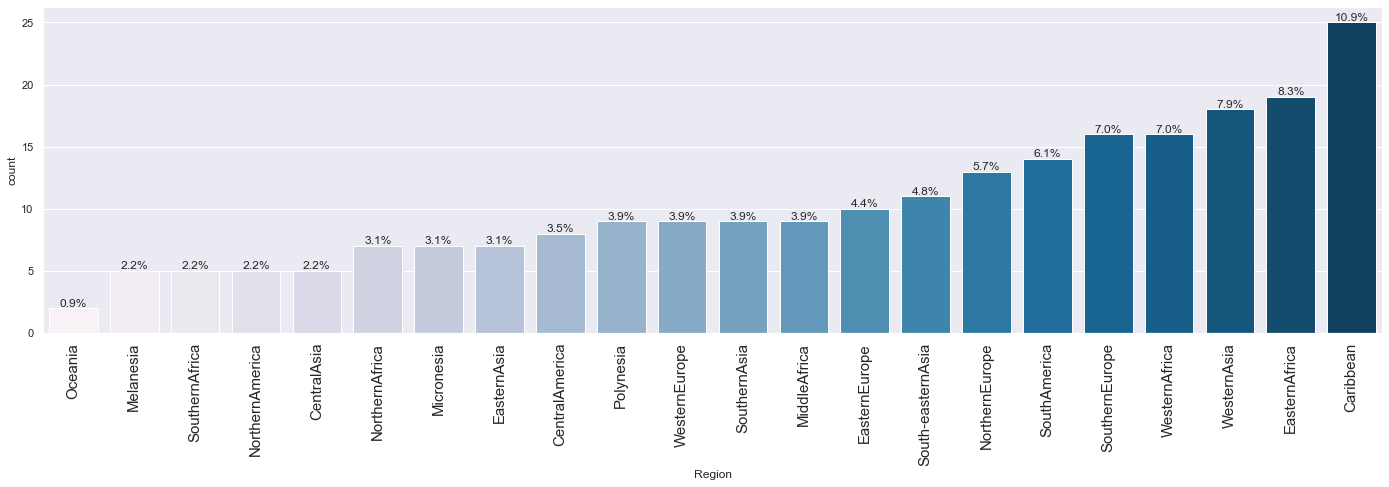

In [20]:
labeled_barplot(df1, "Region", perc=True)

**Observations**

- Approx. 11% of the countries in the data are from the Caribbean region.
- Oceania has the least number of countries in the data.

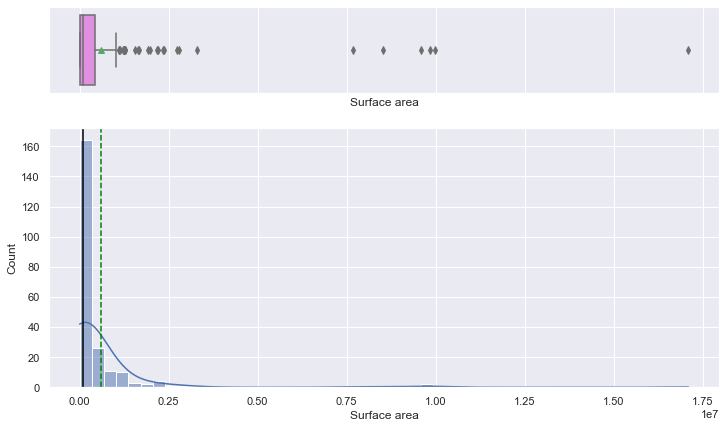

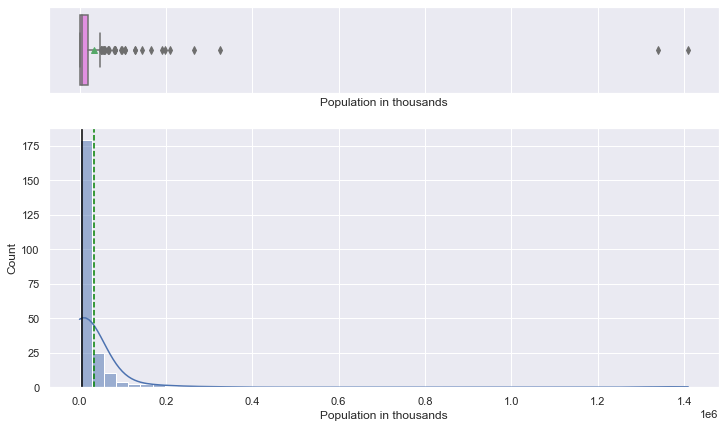

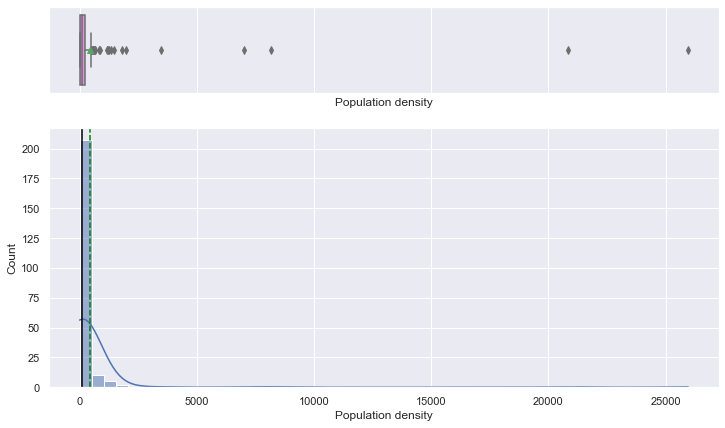

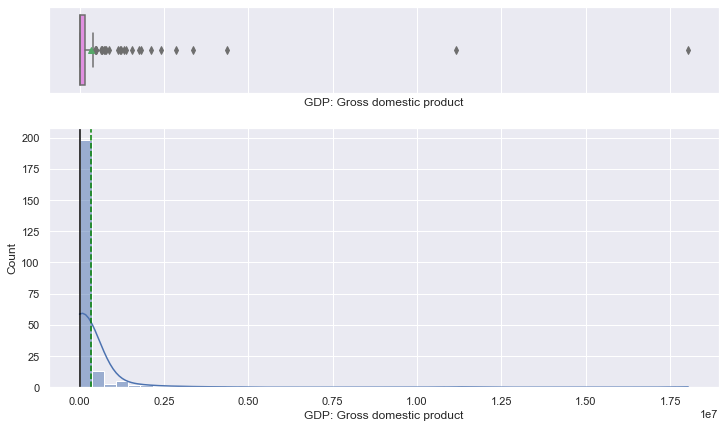

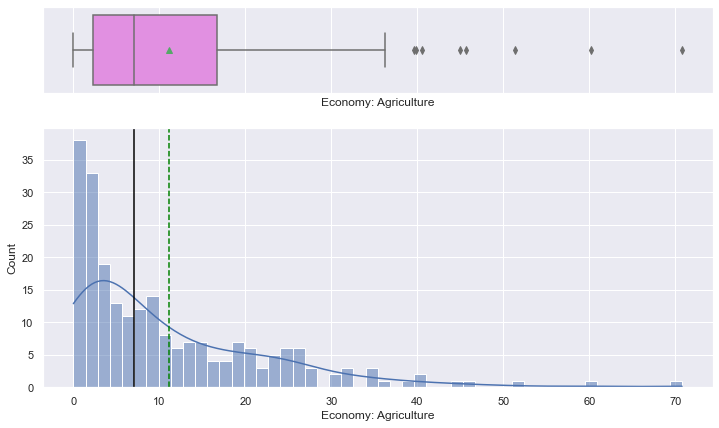

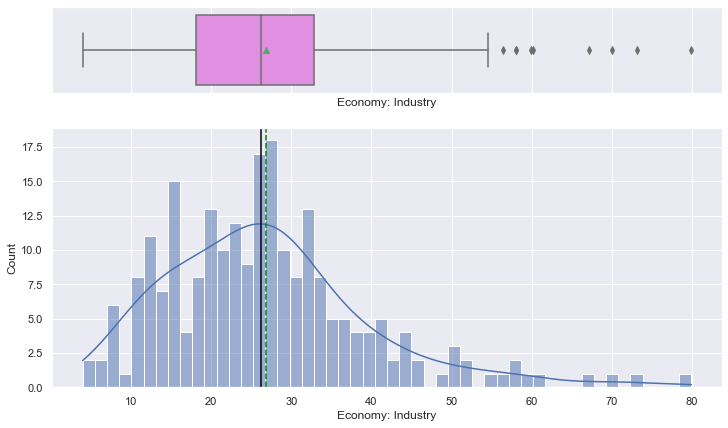

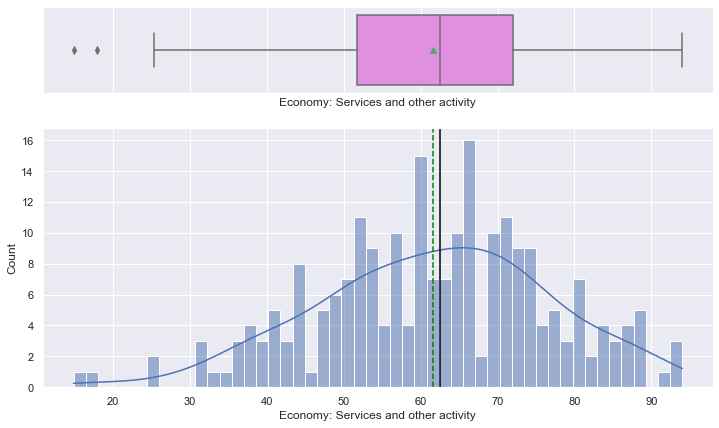

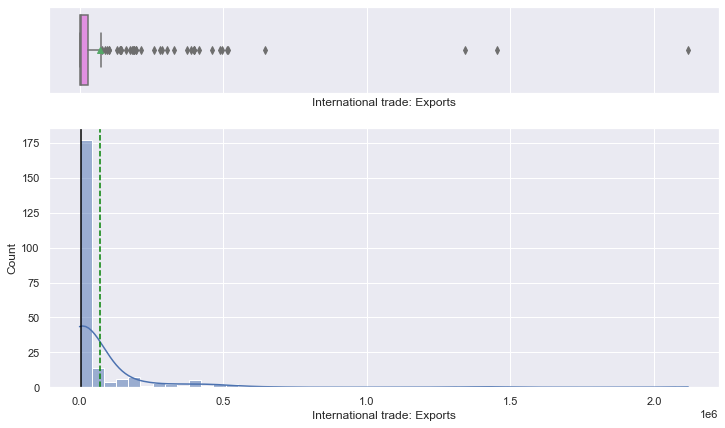

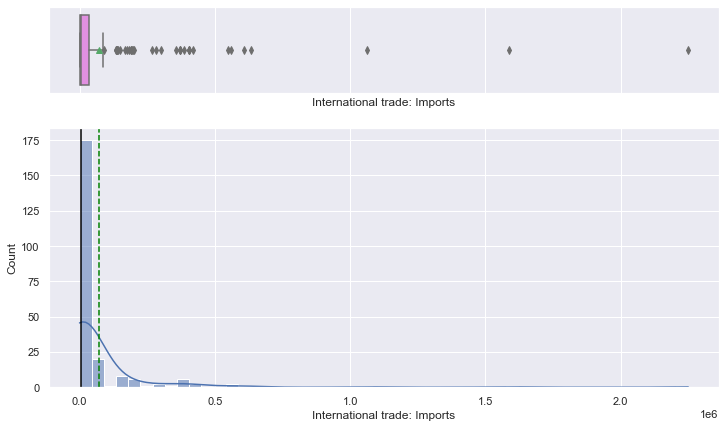

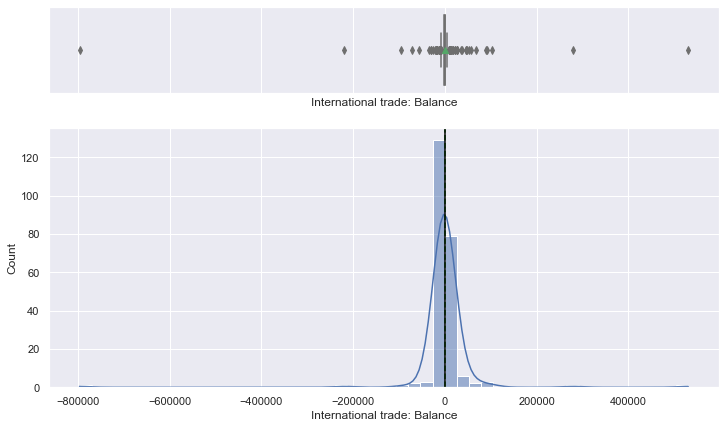

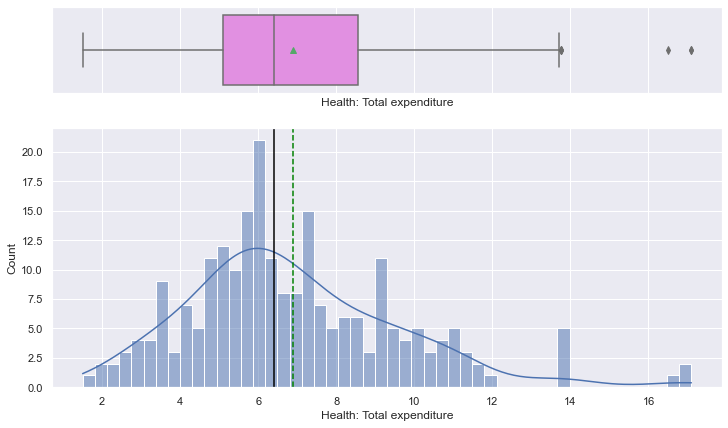

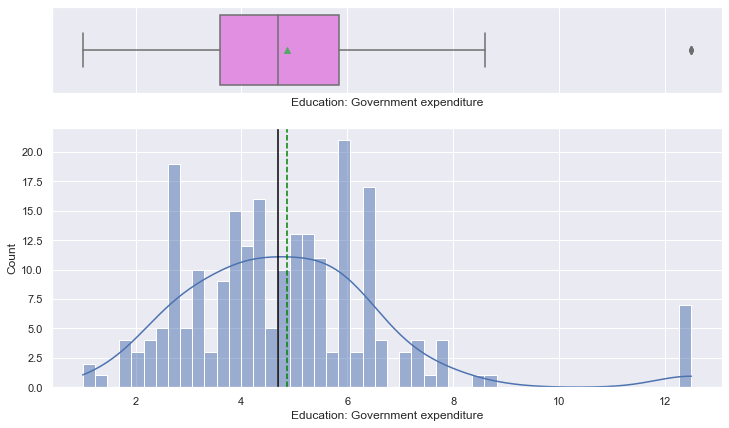

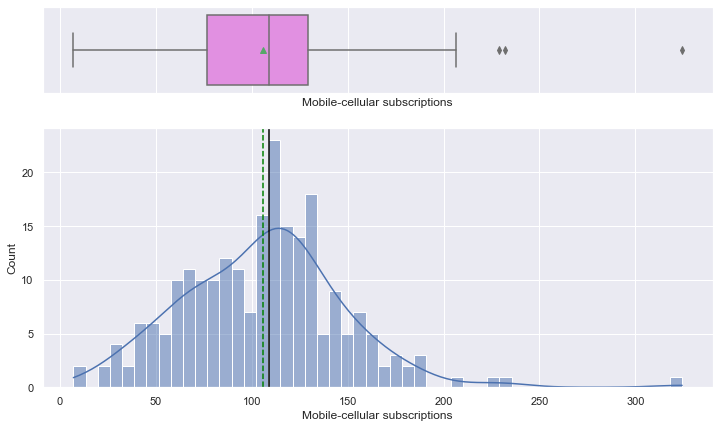

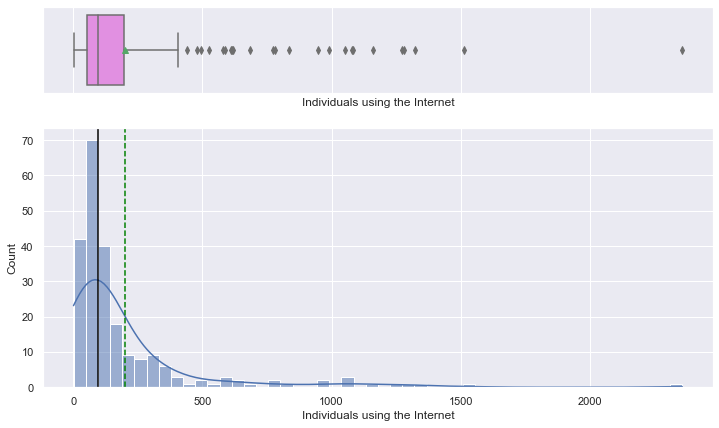

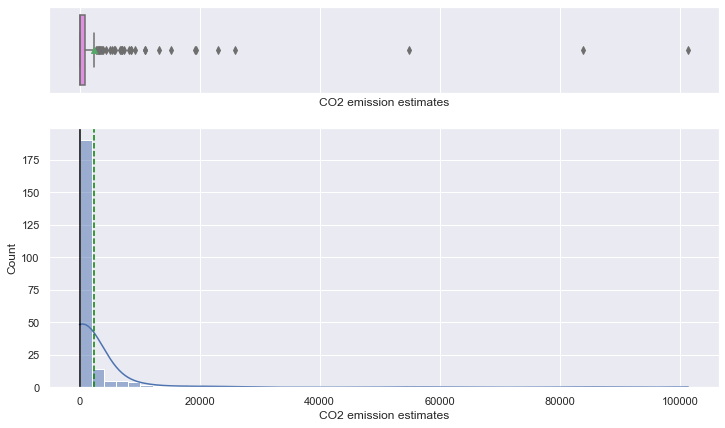

In [22]:
# selecting numerical columns
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df1, item, bins=50, kde=True, figsize=(12, 7))

**Observations**

- Variables like *Surface area*, *Population in thousands*, *Population density*, *GDP*, etc. are right-skewed and have extreme upper outliers.
- *International trade: Balance* is almost normally distributed.

### Bivariate Analysis

**Let's check for correlations.**

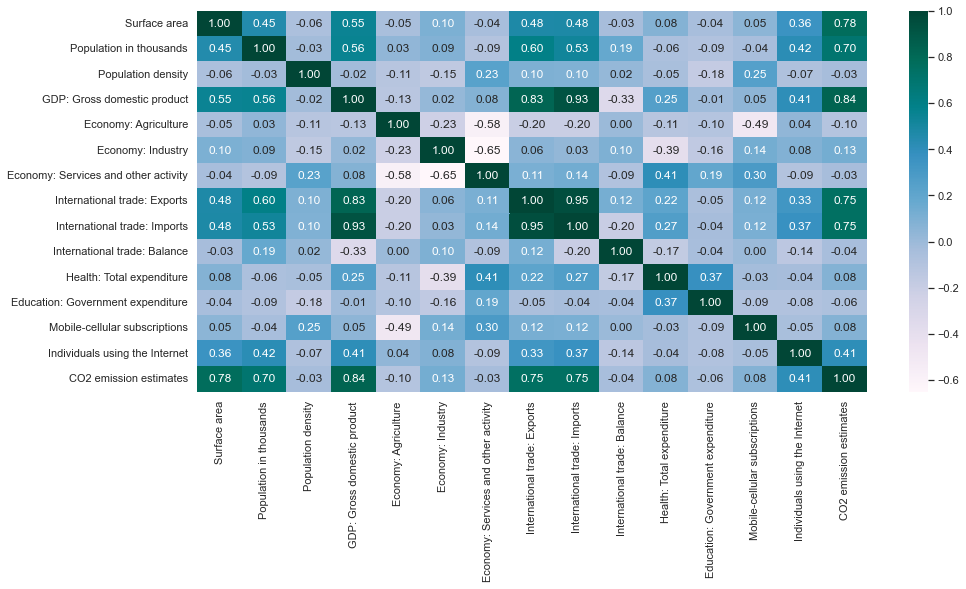

In [23]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[num_cols].corr(), annot=True, fmt=".2f", cmap="PuBuGn"
)
plt.show()

**Observations**

- *International trade: Import* is highly correlated with *International trade: Export* and the GDP of a country, which is obvious as countries with high GDP tend to execute more trades.
- *CO2 emission estimates* is highly correlated with the GDP of a country, indicating that countries with a high GDP tend to have higher amounts of CO2 emissions compared to countries with low GDP.

**Let's scale the data before we proceed to cluster it.**

In [24]:
sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(df1.drop(["country", "Region"], axis=1)),
    columns=df1.drop(["country", "Region"], axis=1).columns,
)
subset_scaled_df.head()

,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Exports,International trade: Imports,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet,CO2 emission estimates
0,0.035310,0.020854,-0.177549,-0.210173,1.042856,-0.274480,-0.553324,-0.326201,-0.315127,-0.022866,0.477955,-0.768586,-1.047607,-0.532544,-0.245291
1,-0.315158,-0.224289,-0.154727,-0.216092,0.966043,-0.064870,-0.659127,-0.323875,-0.310106,-0.031399,-0.364263,-0.669595,0.012310,-0.234595,-0.243167
2,1.006147,0.064378,-0.193677,-0.112187,0.095503,0.812389,-0.738478,-0.194482,-0.116652,-0.237101,0.111773,0.716281,0.168458,-0.217666,0.345149
3,-0.331189,-0.245901,-0.080260,-0.223645,-0.152004,-1.159503,0.326156,-0.332867,-0.330951,0.006091,0.111773,-0.471613,-1.036960,-0.363255,-0.251614
4,-0.331038,-0.245743,-0.129991,-0.222011,-0.903058,-1.244900,1.780935,-0.332470,-0.325219,-0.010646,0.441337,-0.768586,-0.420647,-0.630731,-0.251563


## Hierarchical Clustering

In [25]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# The Mahalanobis distance is a measure of the distance between a point P and a distribution D.
# It is a multi-dimensional generalization of the idea of measuring how many standard deviations away P is from the mean of D.

# Cityblock distance is the L1 distance, or Manhattan distance.
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm) # Perform hierarchical/agglomerative clustering.
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df)) # Calculate the cophenetic distances between each observation 
        # in the hierarchical clustering defined by the linkage Z.

        # Returns: The cophentic correlation distance and
        # The cophenetic distance matrix in condensed form.
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9445948553450796.
Cophenetic correlation for Euclidean distance and complete linkage is 0.670393746522615.
Cophenetic correlation for Euclidean distance and average linkage is 0.9600754383608453.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.9292641722038358.
Cophenetic correlation for Chebyshev distance and single linkage is 0.925804529062162.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.809423835918078.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8905660890672064.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8596505192838028.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8376066260733129.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7208099852862927.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8190087523674371.
Cophenetic corre

In [26]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9600754383608453, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [27]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9445948553450796.
Cophenetic correlation for complete linkage is 0.670393746522615.
Cophenetic correlation for average linkage is 0.9600754383608453.
Cophenetic correlation for centroid linkage is 0.9621285099870416.
Cophenetic correlation for ward linkage is 0.5294432766535425.
Cophenetic correlation for weighted linkage is 0.9292641722038358.


In [28]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9621285099870416, which is obtained with centroid linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and centroid linkage.**

**Let's see the dendrograms for the different linkage methods.**

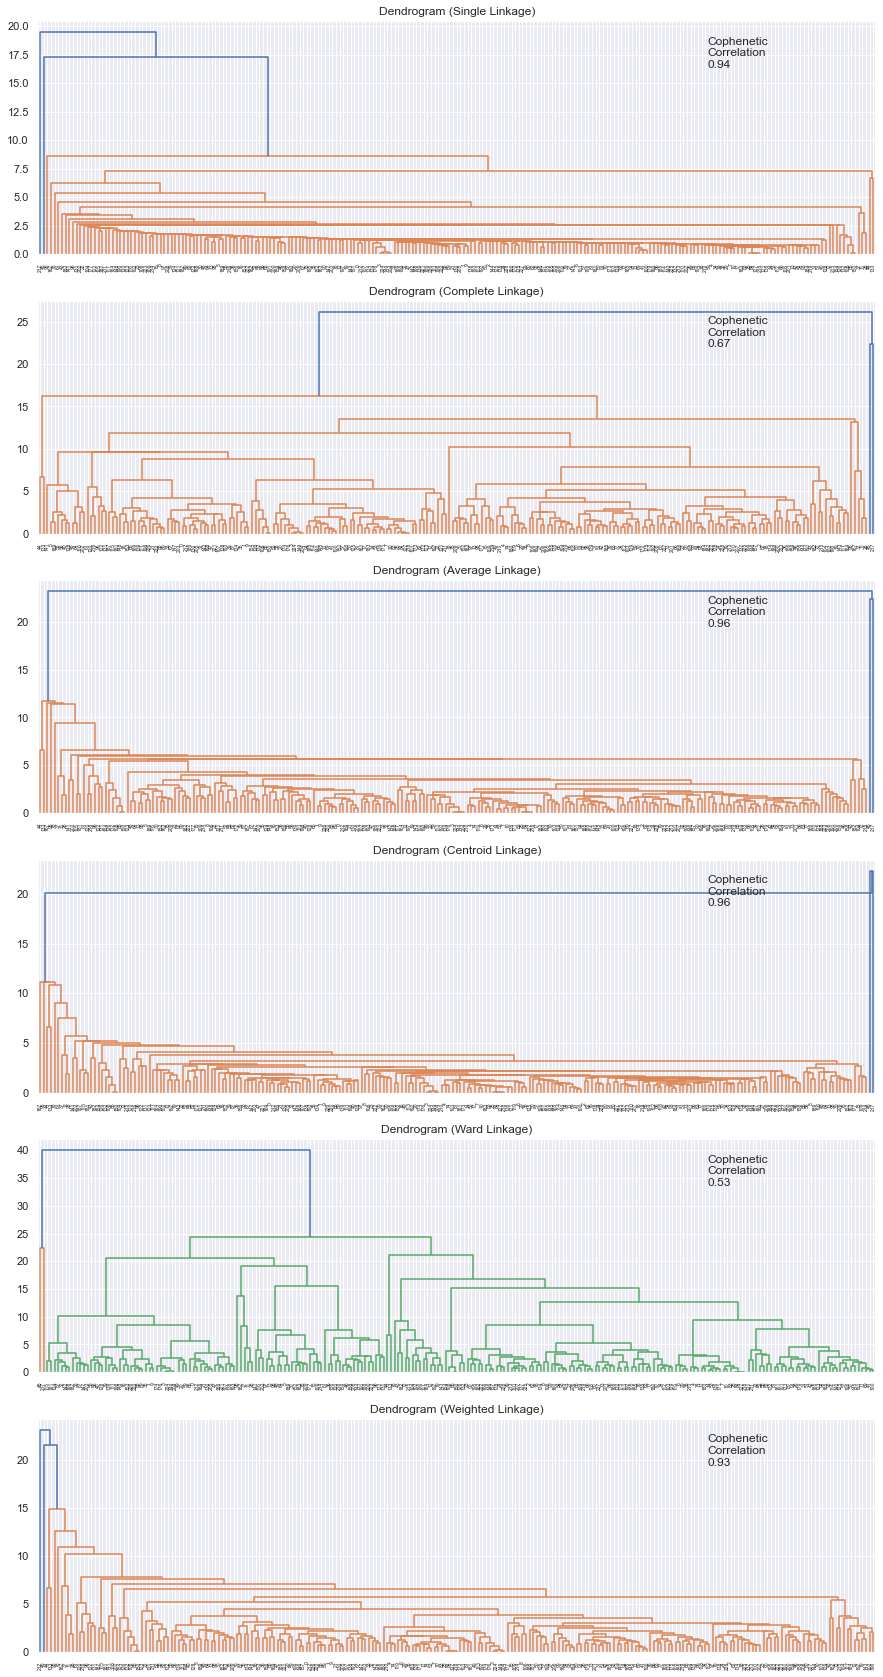

In [29]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with average linkage.
- 6 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [30]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [31]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

## Cluster Profiling

In [32]:
cluster_profile = df1.groupby("HC_Clusters").mean()

In [33]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("HC_Clusters")["Surface area"].count().values
)

In [34]:
# let's see the names of the countries in each cluster
for cl in df1["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df1[df1["HC_Clusters"] == cl]["country"].unique())
    print()

In cluster 0, the following countries are present:
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bonaire, Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile'
 'China, Hong Kong SAR' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Falkland Islands (Mal

**We see that there are 4 clusters of one country, 1 cluster of two countries, and all the other countries are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 6 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.**

In [35]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=6)

In [36]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

## Cluster Profiling

In [37]:
cluster_profile = df1.groupby("HC_Clusters").mean()

In [38]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("HC_Clusters")["Surface area"].count().values
)

In [39]:
# let's see the names of the countries in each cluster
for cl in df1["HC_Clusters"].unique():
    print(
        "The",
        df1[df1["HC_Clusters"] == cl]["country"].nunique(),
        "countries in cluster",
        cl,
        "are:",
    )
    print(df1[df1["HC_Clusters"] == cl]["country"].unique())
    print("-" * 100, "\n")

The 88 countries in cluster 0 are:
['Afghanistan' 'Albania' 'American Samoa' 'Angola' 'Armenia' 'Azerbaijan'
 'Bahrain' 'Bangladesh' 'Belize' 'Benin' 'Brunei Darussalam'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Central African Republic'
 'Chad' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Dominica' 'Ecuador'
 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Gabon' 'Guinea-Bissau' 'Guinea'
 'Guyana' 'Indonesia' 'Iran (Islamic Republic of)' 'Iraq' 'Kenya' 'Kuwait'
 "Lao People's Democratic Republic" 'Liberia' 'Libya' 'Madagascar'
 'Malaysia' 'Mali' 'Mauritania' 'Mayotte' 'Mexico' 'Mozambique' 'Myanmar'
 'Nauru' 'Nepal' 'New Caledonia' 'Niger' 'Nigeria' 'Niue' 'Oman'
 'Pakistan' 'Papua New Guinea' 'Peru' 'Philippines' 'Qatar' 'Rwanda'
 'Saint Helena' 'Samoa' 'Sao Tome and Principe' 'Saudi Arabia'
 'Sierra Leone' 'Solomon Islands' 'Somalia' 'South Africa' 'South Sudan'
 'Sri Lanka' 'Sudan' 'Syrian Arab Republic' 

**Now the clusters seem to have more variability.**

In [40]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Exports,International trade: Imports,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet,CO2 emission estimates,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,,,,
0,463433.380682,30038.693182,146.256818,101418.500000,18.610795,31.073864,49.630114,27282.568182,27855.022727,-570.051136,5.220455,3.949432,87.479545,276.727273,1966.465909,88
1,16.000000,331.000000,23395.700000,26218.000000,3.225000,10.000000,90.000000,199645.000000,190818.500000,8826.500000,5.375000,1.500000,206.600000,16.000000,269.000000,2
2,214490.125000,10376.734848,345.817424,223120.636364,6.454167,24.172348,69.060985,66924.227273,65921.265152,1069.484848,7.926136,5.511742,116.243561,116.007576,662.318182,132
3,9600000.000000,1409517.000000,150.100000,11158457.000000,9.200000,41.100000,49.700000,2118981.000000,1588696.000000,530285.000000,5.500000,3.600000,93.200000,1080.000000,101394.000000,1
4,9833517.000000,324460.000000,35.500000,18036648.000000,1.000000,19.700000,79.300000,1453167.000000,2249661.000000,-796494.000000,17.100000,5.400000,117.600000,1513.000000,83887.000000,1
5,9315601.200000,350706.600000,98.280000,1599702.600000,6.240000,27.860000,65.880000,261918.800000,253774.800000,8144.000000,7.980000,4.840000,116.020000,669.400000,24687.600000,5


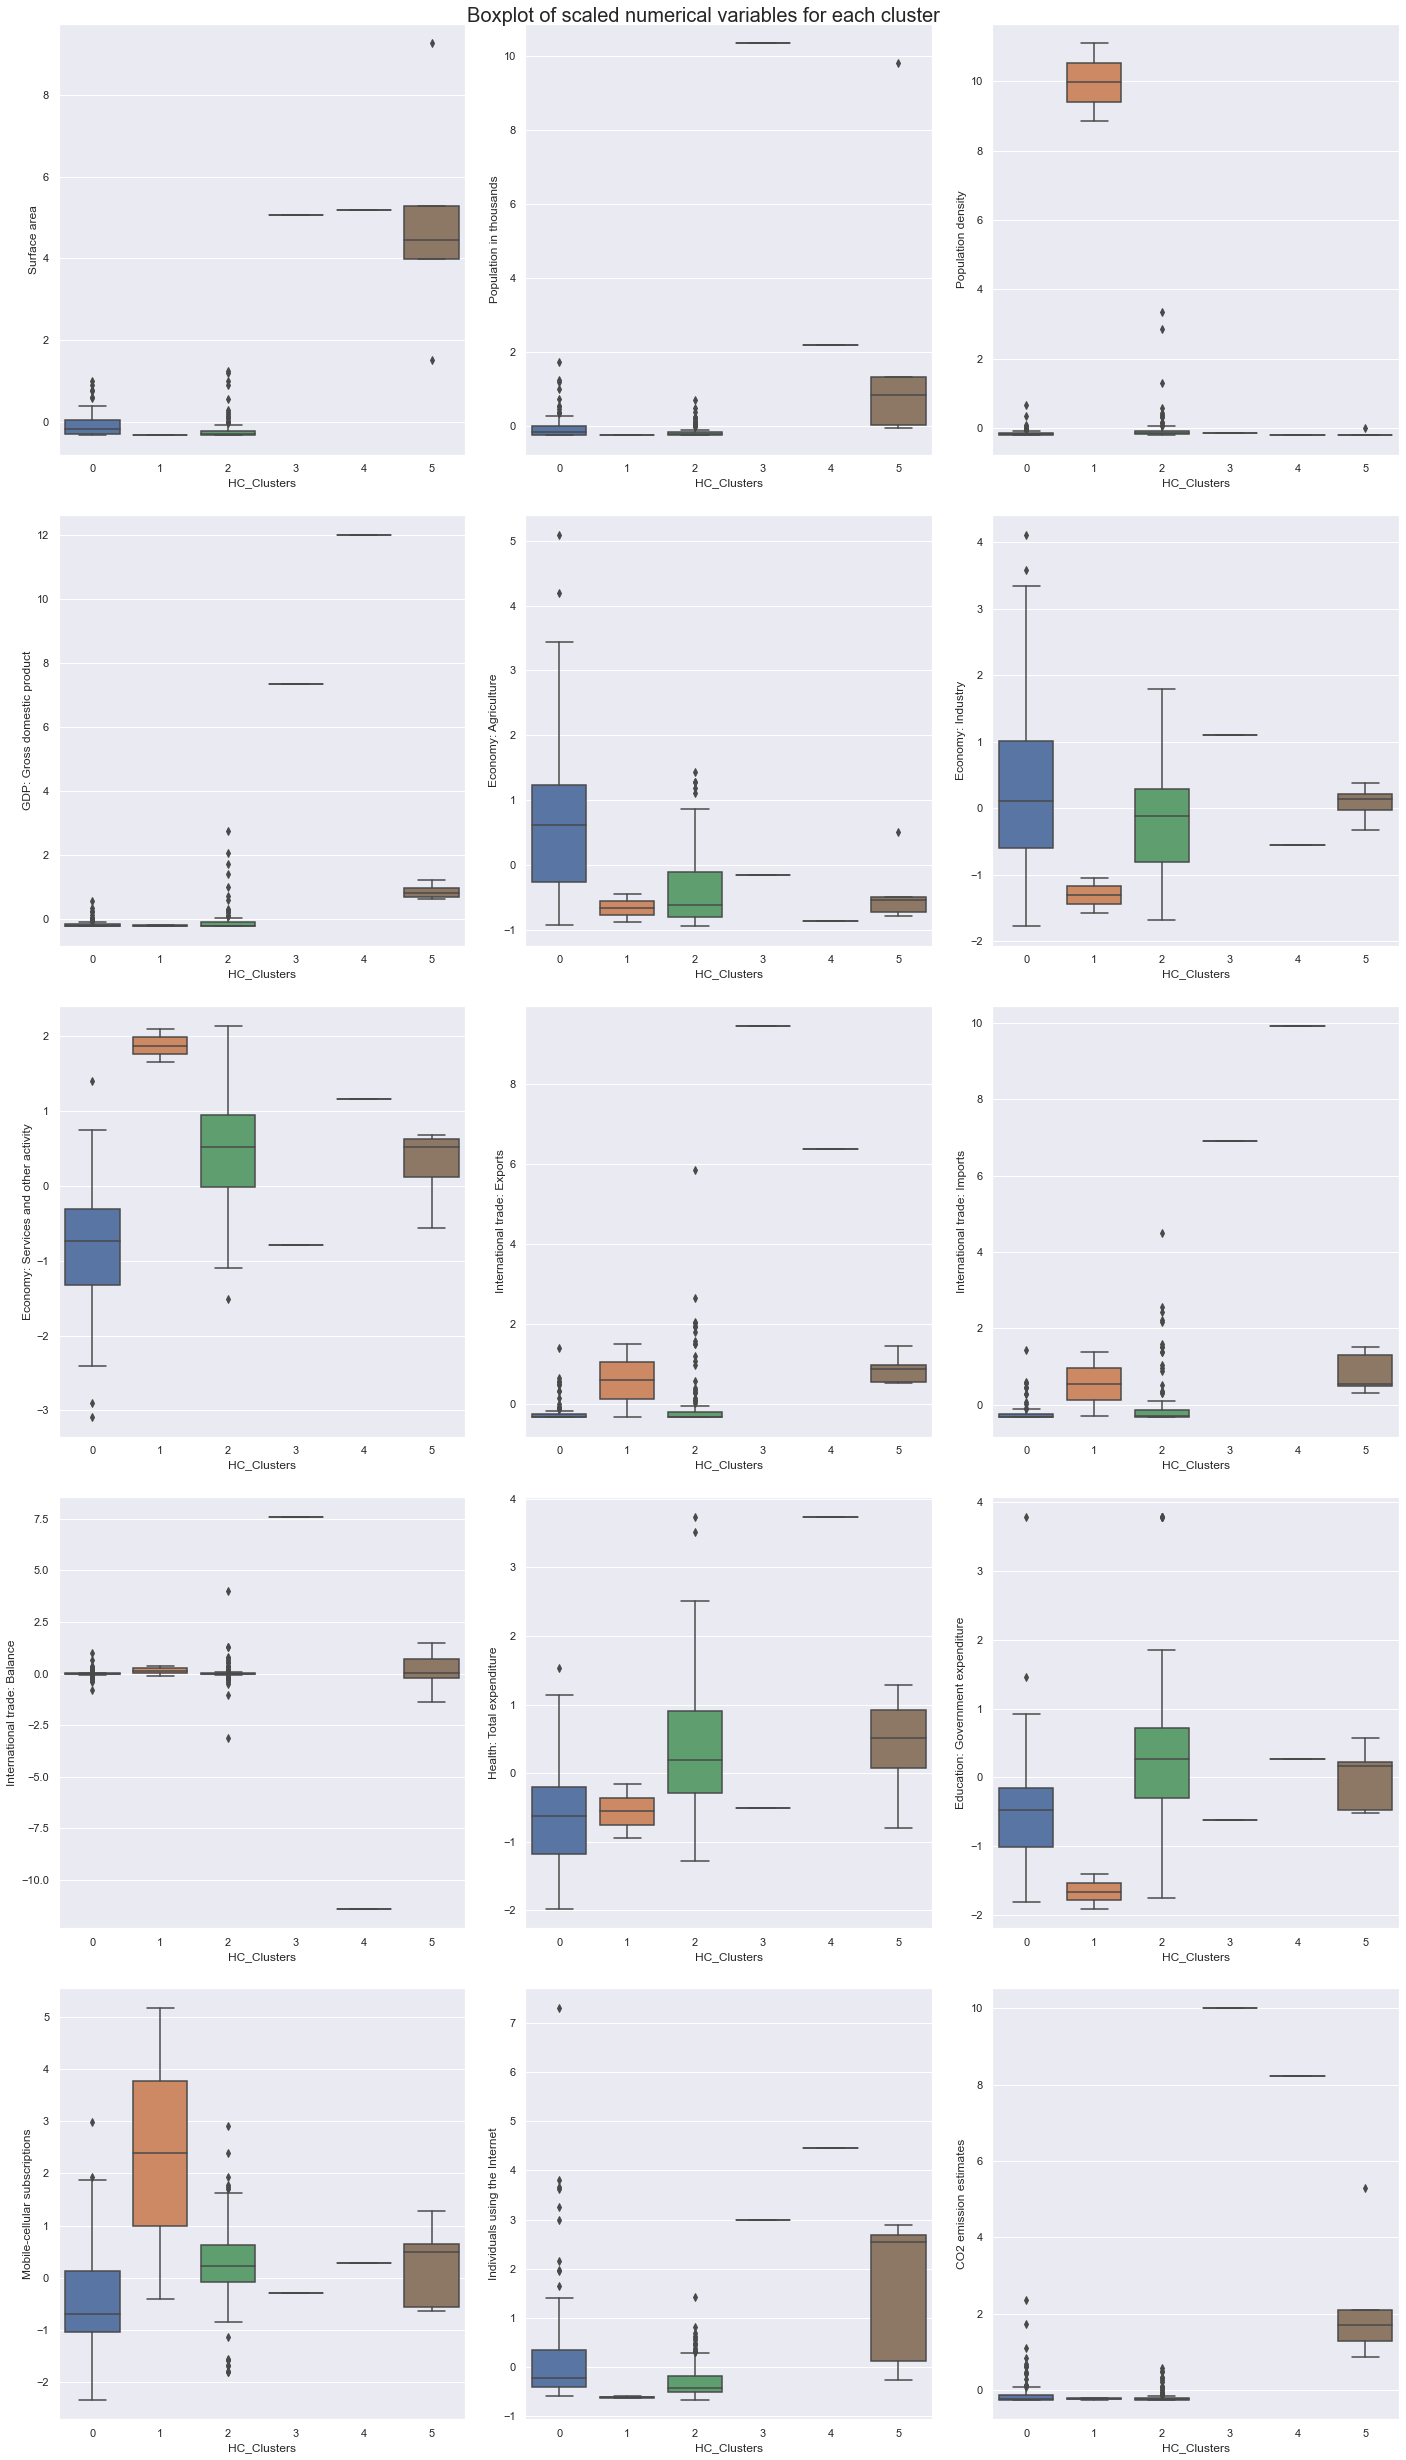

In [41]:
fig, axes = plt.subplots(5, 3, figsize=(20, 35))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii][0],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][2],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1


fig.tight_layout(pad=2.0)

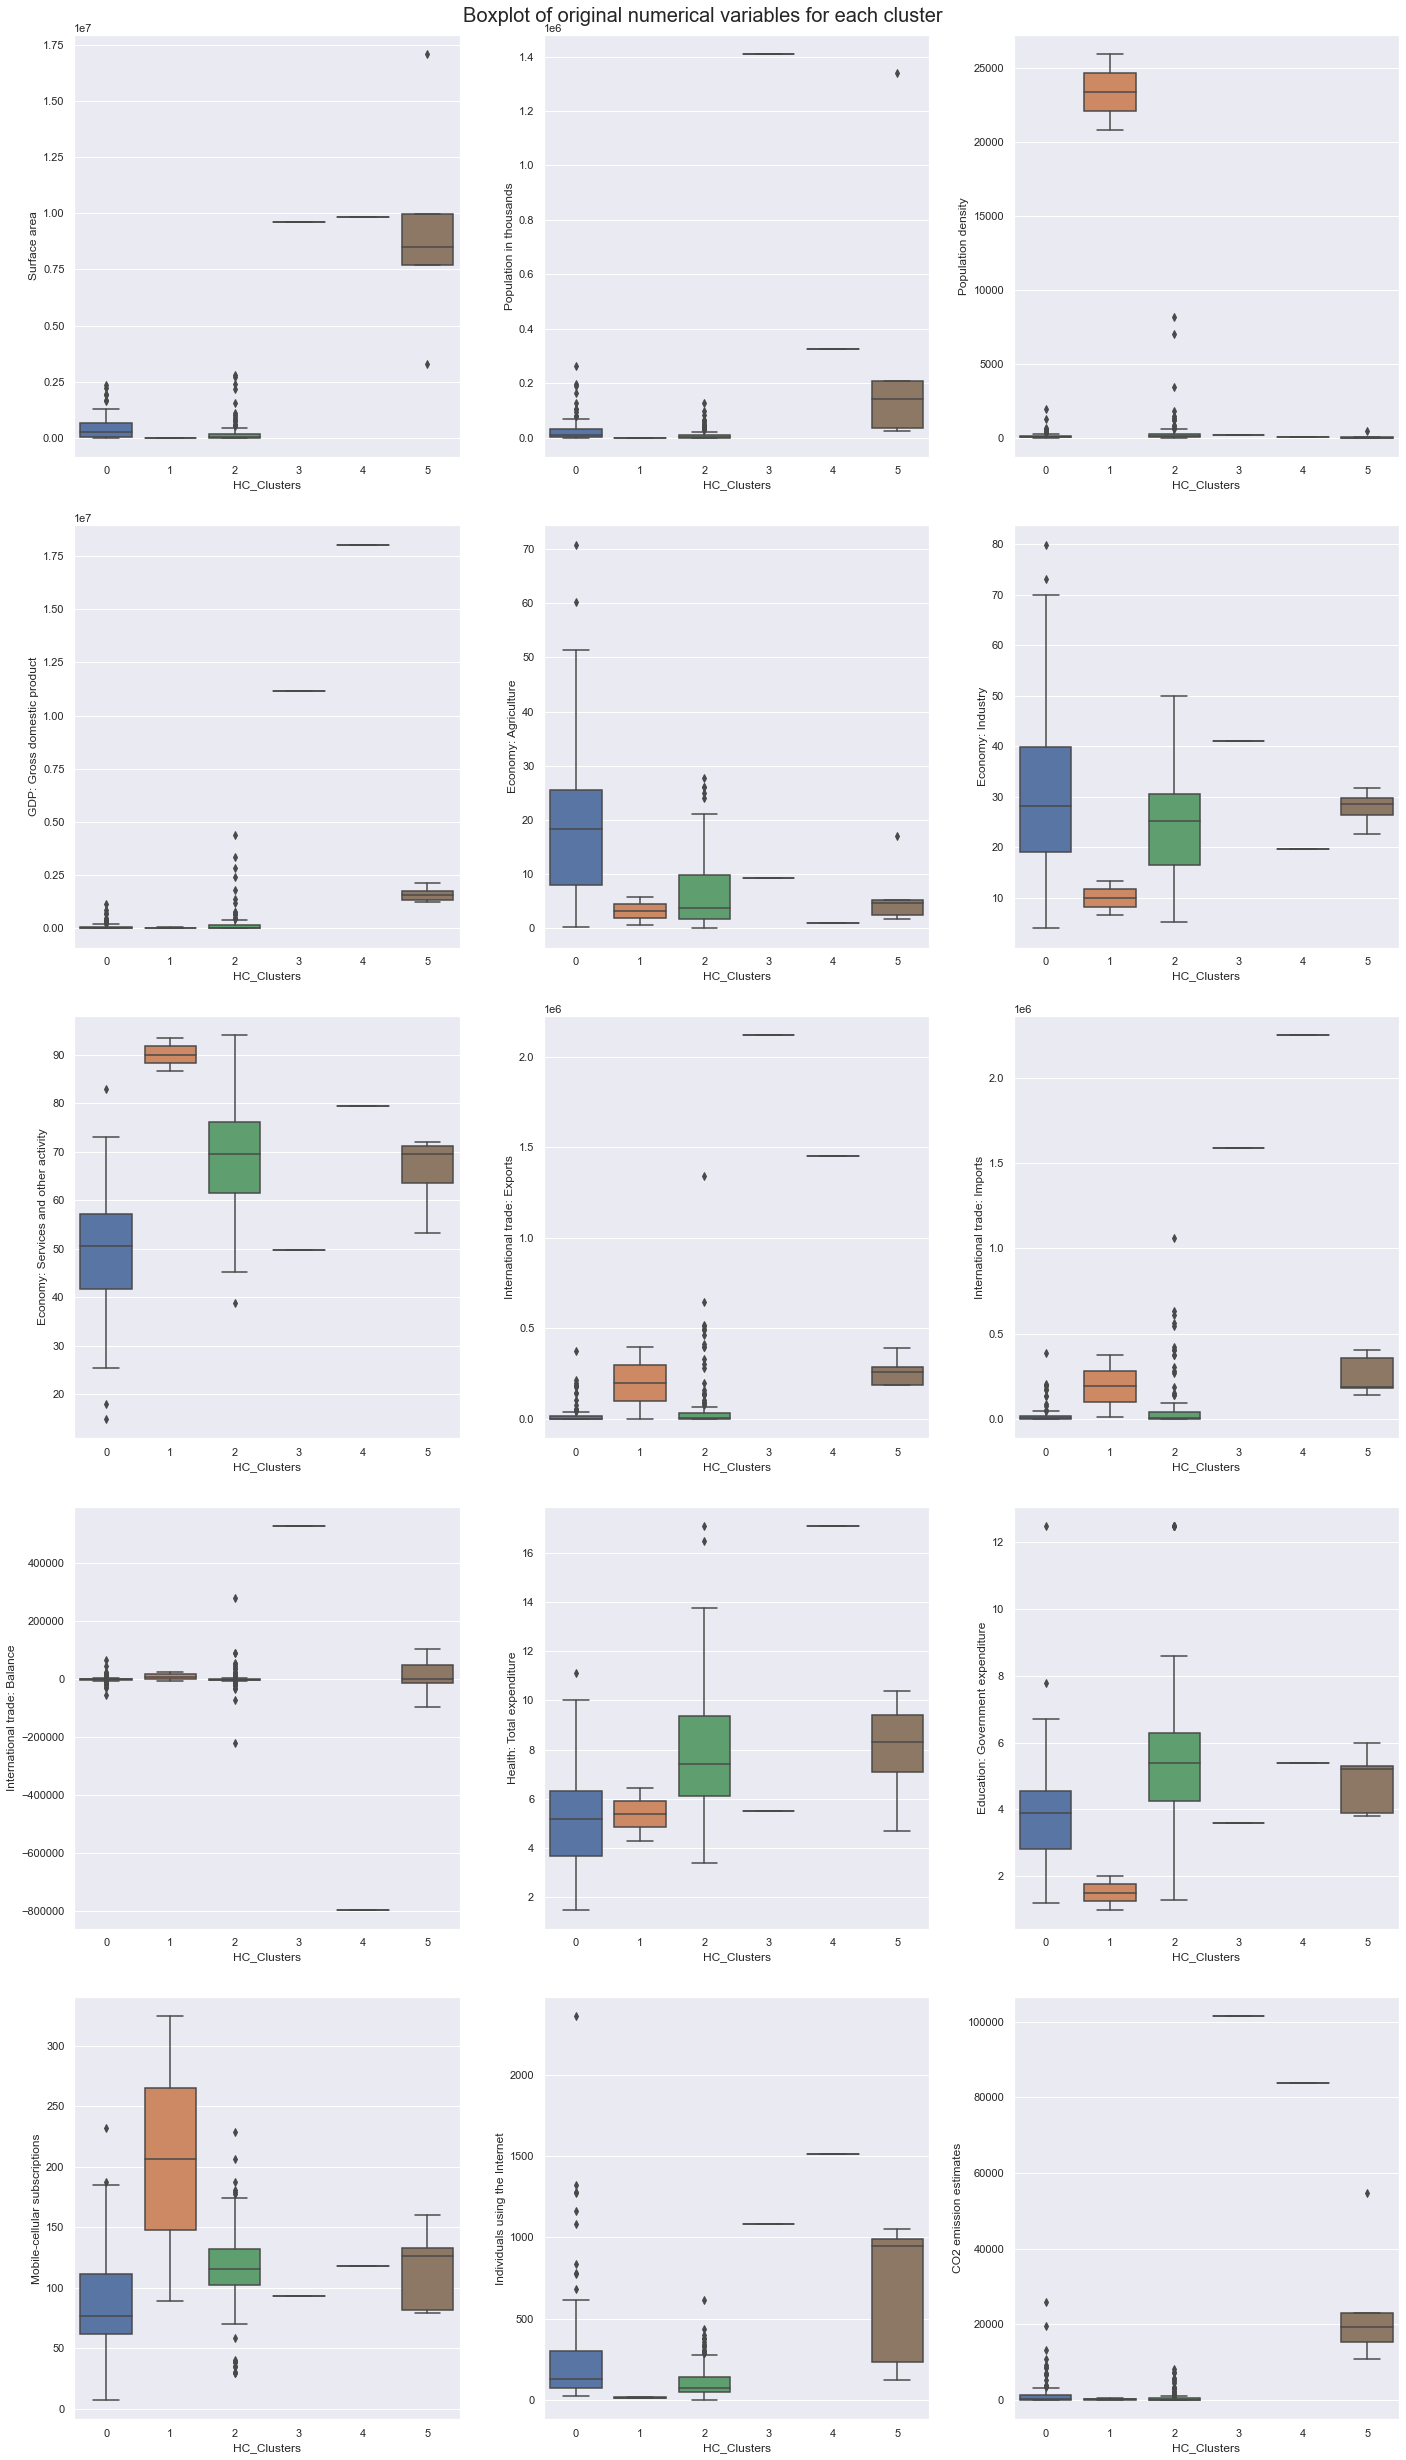

In [42]:
fig, axes = plt.subplots(5, 3, figsize=(20, 35))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii][0], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][1], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][2], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1


fig.tight_layout(pad=2.0)

## Insights

We will look into clusters 0, 2, and 5 only because the other clusters have only 1 or 2 countries in them.

- **Cluster 0**
   - There are 88 countries in this cluster.
   - The number of individuals using the internet is moderate and mobile subscribers are low to moderate.
   - Expenditure on health is low to moderate and that on education is also low to moderate.
   - GDP is low but the economy is healthy and balanced across agriculture, industry, services, and other activities.
   
   
- **Cluster 2**
   - There are 132 countries in this cluster.
   - The number of individuals using the internet is low but mobile subscribers are high.
   - Expenditure on health is moderate to high and that on education is also moderate to high.
   - GDP is moderate and economy is moderately healthy with a slightly high dependence on services and other activities.
   
   
- **Cluster 5**
   - There are 5 countries in this cluster.
   - The number of individuals using the internet are moderate to high and mobile subscribers are also moderate to high.
   - Expenditure on health is high and that on education is moderate.
   - GDP is high and economy is moderately healthy with a slightly high dependence on services and other activities.


## Recommendations

**Cluster 5 countries are good places to provide tourism services based on cluster profiling done above.**

## Dimensionality Reduction using PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [46]:
# importing library
from sklearn.decomposition import PCA

In [48]:
covMatrix = np.cov(subset_scaled_df,rowvar=False)
print(covMatrix)

[[ 1.00438596  0.45682341 -0.0583399   0.55114511 -0.04678492  0.10479103
  -0.04398875  0.47847399  0.48293549 -0.03235581  0.08110436 -0.04359085
   0.05431924  0.35879276  0.78288369  0.44784043]
 [ 0.45682341  1.00438596 -0.02515975  0.55950284  0.03377389  0.08674868
  -0.09355703  0.59849476  0.53130924  0.18767586 -0.06108196 -0.08673467
  -0.04456208  0.42149144  0.70215045  0.2398608 ]
 [-0.0583399  -0.02515975  1.00438596 -0.02355987 -0.11147839 -0.15104257
   0.23571342  0.10407716  0.09605762  0.02124598 -0.0494873  -0.17900878
   0.25004574 -0.07374371 -0.03489659  0.00612929]
 [ 0.55114511  0.55950284 -0.02355987  1.00438596 -0.12732619  0.02282528
   0.08430903  0.83532318  0.93078518 -0.33104817  0.25388849 -0.01047396
   0.05188871  0.4141539   0.83976157  0.31572263]
 [-0.04678492  0.03377389 -0.11147839 -0.12732619  1.00438596 -0.22902192
  -0.581458   -0.20207739 -0.20031919  0.00179494 -0.11317404 -0.09932534
  -0.49036011  0.03858922 -0.09686154 -0.52562919]
 [ 0.

In [67]:
pca = PCA(n_components=10)
pca.fit(subset_scaled_df)

PCA(n_components=10)

In [68]:
print(pca.explained_variance_) # Eigen values

[5.00543509 2.92170509 1.77158749 1.33968596 1.19807314 0.8660414
 0.75508425 0.65773488 0.52601965 0.49718353]


In [69]:
print(pca.components_) # Eigen vectors

[[ 0.31727464  0.30527949  0.0152257   0.40858404 -0.12310078  0.00960186
   0.0920748   0.39514705  0.40704707 -0.05235197  0.13107066  0.00921706
   0.0784024   0.20849946  0.40080439  0.25129246]
 [ 0.09721387  0.19698084 -0.11125702  0.06726264  0.30939817  0.31467879
  -0.5050062   0.05981169  0.0349323   0.07546969 -0.34083943 -0.25190922
  -0.20134336  0.20095229  0.15334235 -0.43647039]
 [-0.01898419 -0.00346062  0.29291171 -0.10580365 -0.44639403  0.38303574
   0.0416418   0.05533576 -0.01670243  0.2238149  -0.34919936 -0.30336214
   0.52790036 -0.09126029  0.00147406  0.02248497]
 [-0.17558317 -0.04720432  0.57254988  0.11199687  0.20092519 -0.42182384
   0.20776401  0.09460739  0.16344421 -0.21947206 -0.0417166  -0.41482588
   0.00727074  0.07923567 -0.04709298 -0.31450156]
 [-0.05471854 -0.34173981 -0.15679756  0.19722813 -0.18759589  0.28532913
  -0.09209075 -0.14634076  0.10231845 -0.77374695  0.02606151  0.00134096
   0.15880679  0.1483871  -0.0465646  -0.10484805]
 [-0.

In [70]:
print(pca.explained_variance_ratio_) # % of variance explained by each eigen vector

[0.30619131 0.17872586 0.10837114 0.08195096 0.07328825 0.05297728
 0.04618984 0.04023481 0.03217755 0.0304136 ]


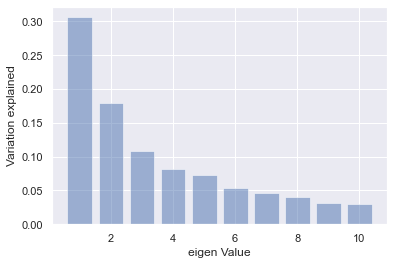

In [61]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

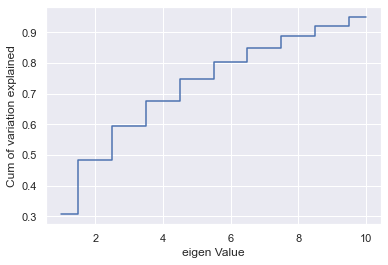

In [62]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [71]:
# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [72]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.4849171770630442

- The first two principal components explain 48.5% of the variance in the data.

In [76]:
reduced_df_pca.head()

,Component 1,Component 2
0,-1.071870,1.161620
1,-1.218240,1.280536
2,0.409211,0.200795
3,-1.076293,0.051526
4,-0.311720,-2.026036


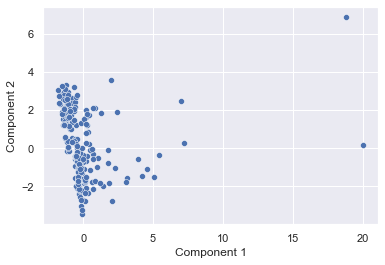

In [73]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2");

- We can kind of see two broad clusters if we draw a horizontal line around y=1.
- There a few outlier points too.

Let's colour the scatterplot by cluster labels.

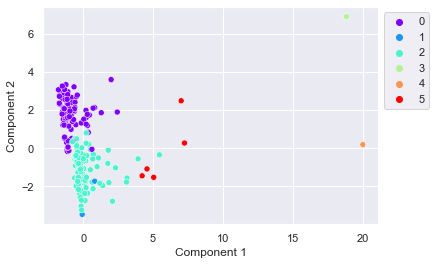

In [75]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df1["HC_Clusters"],
    palette="rainbow",
);
plt.legend(bbox_to_anchor=(1, 1));

- Cluster 0 and 2 are the major clusters.
- The rest of the data points seem to be mostly outliers.